# Getting started with Somnium

In this notebook, a toy dataset is created in order to show how to run the algorithm. The dataset contains synthetic features about 10,000 patient's weight, height, BMI, fat % and an independent random variable. Two maps are generated and plotted: one with hexagonal lattice and another with rectangular lattice.

In [ ]:
%cd ..

In [ ]:
!kaggle datasets download -d giovamata/airlinedelaycauses
!unzip airlinedelaycauses.zip

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from somnium.core import SOM
from somnium.visualization import plot_components, plot_bmus, plot_umatrix
from somnium.visualization import _calculate_bmus_matrix, _plot_bmus

## Dataset creation

In [4]:
df = (pd.DataFrame({"weight": np.random.randn(10000)*8+75,
                    "height": np.random.randn(10000)*8+180})
      .assign(BMI=lambda d: 703*d.weight/(d.height**2),
              fat=lambda d: ((d.weight-75)/8)*2 + 23.5 +
              np.random.randn(10000)*3,
              random=10+np.random.randn(10000)
              ))

data = df.values[:-10] # We leave some data out for testing purposes
test_data = df.values[-100:] # Test data

names = df.columns
df.head()

,weight,height,BMI,fat,random
0,76.792676,182.267034,1.625021,29.066051,9.857744
1,69.478771,175.567023,1.584607,28.290787,11.292425
2,73.106242,175.198285,1.674365,21.874359,9.290289
3,80.814396,184.444528,1.669985,21.396334,7.721821
4,74.655990,184.249844,1.545987,25.751035,10.067134


## Hexagonal lattice SOM

E_Quantization = 0.3396984694061753
E_Topographic = 0.055455455455455493


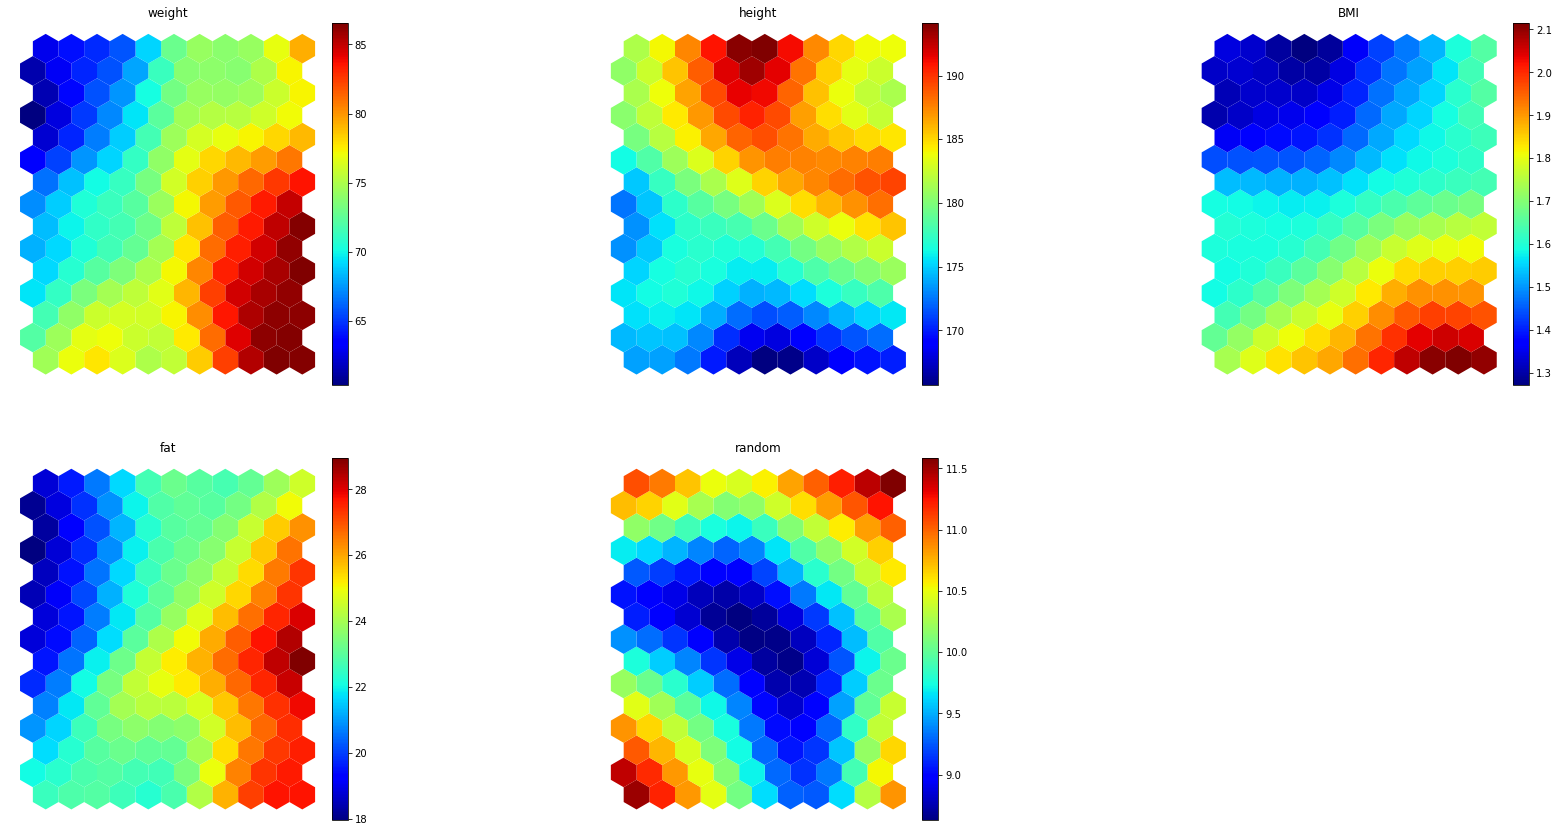

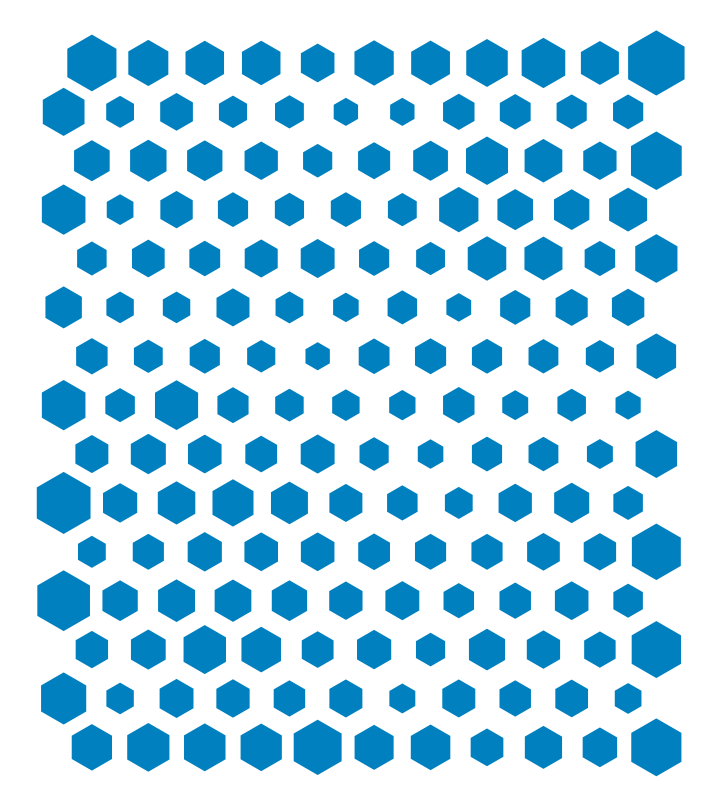

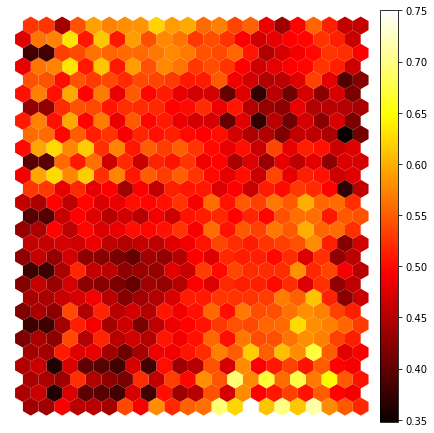

In [5]:
model = SOM(lattice="hexa", normalization="standard", distance_metric="euclidean", neighborhood="gaussian", mapsize=[15, 11], n_jobs=1)

model.fit(data, 30, 20, 5)
model.fit(data, 30, 5, 1)

print("E_Quantization =", model.calculate_quantization_error())
print("E_Topographic =", model.calculate_topographic_error())

plot_components(model, names, figure_width=30, max_subplot_columns=3)
plot_bmus(model, figure_width=10)
plot_umatrix(model, colormap = plt.cm.hot, figure_width=10)

### Inferring the test set's BMUs

In [6]:
test_set_bmus = model.predict(test_data)

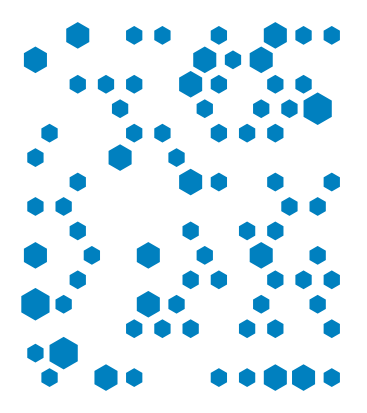

In [7]:
bmu_hits=_calculate_bmus_matrix(test_set_bmus, model.codebook.n_rows, model.codebook.n_columns)
fig=_plot_bmus(bmu_hits=bmu_hits, nrows=model.codebook.n_rows, ncols=model.codebook.n_columns, 
               lattice_name=model.codebook.lattice.name, 
               figure_width=10)
ax=plt.gca()
plt.show()

## Rectangular lattice SOM

E_Quantization = 0.3489982897469983
E_Topographic = 0.0696696696696697


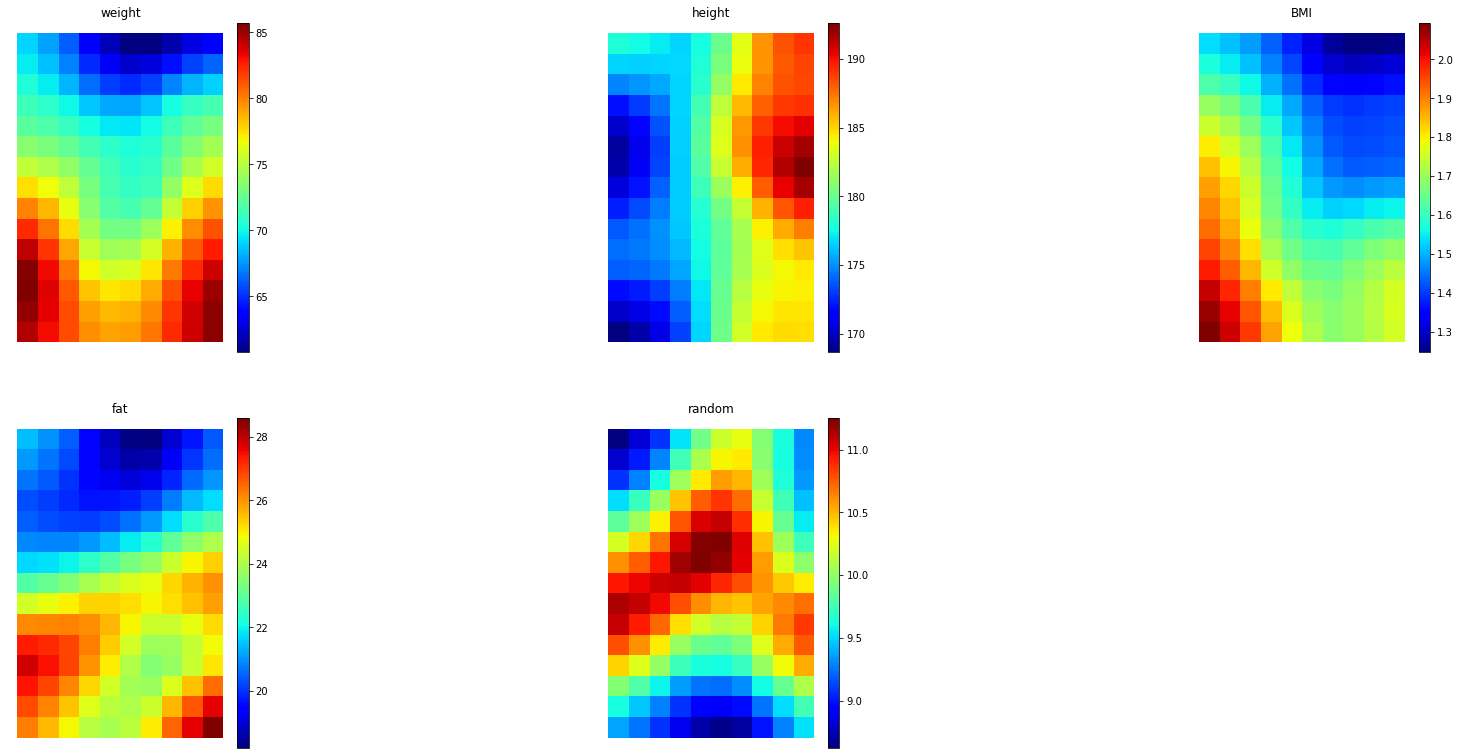

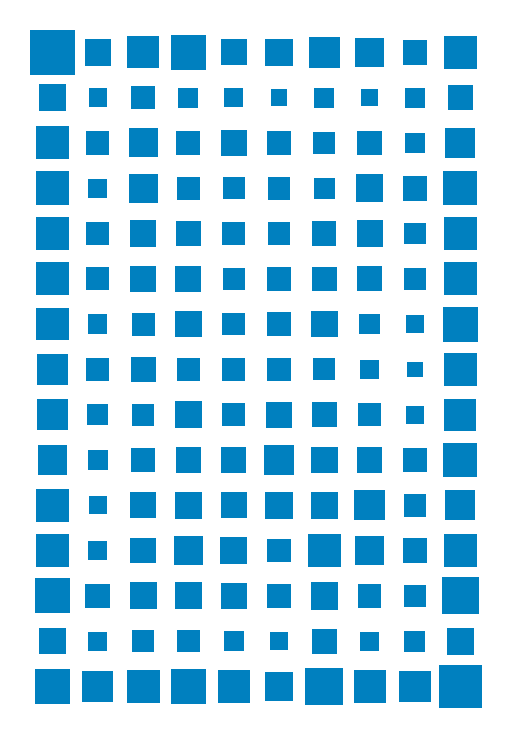

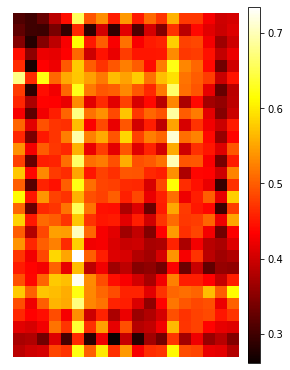

In [8]:
model = SOM(lattice="rect", normalization="standard", distance_metric="euclidean", neighborhood="epanechicov", mapsize=[15, 10])

model.fit(data, 30, 20, 5)
model.fit(data, 30, 5, 3)

print("E_Quantization =", model.calculate_quantization_error())
print("E_Topographic =", model.calculate_topographic_error())

plot_components(model=model, names=names, figure_width=30, max_subplot_columns=3)
plot_bmus(model, figure_width=10)
plot_umatrix(model=model, colormap = plt.cm.hot, figure_width=10)

In [9]:
test_set_bmus = model.predict(test_data)

### Inferring the test set BMUs

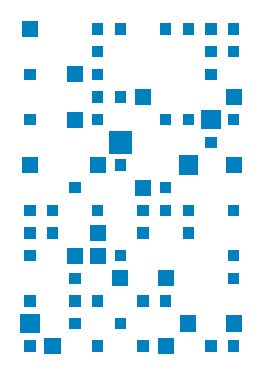

In [10]:
bmu_hits=_calculate_bmus_matrix(test_set_bmus, model.codebook.n_rows, model.codebook.n_columns)
fig=_plot_bmus(bmu_hits=bmu_hits, nrows=model.codebook.n_rows, 
               ncols=model.codebook.n_columns, lattice_name=model.codebook.lattice.name, 
               figure_width=10)
ax=plt.gca()
plt.show()